In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import the data/csv file
data=pd.read_csv('Iris.csv')

In [3]:
#intial 5 rows of the csv file
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#deleting the Species(Iris-setosa) fronm Species column
data = data.drop(data[data.Species == 'Iris-setosa'].index)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#deleting the columns SepalLengthCm and SepalWidthCm
data = data.drop(['SepalLengthCm','SepalWidthCm'],axis = 1)
data

,PetalLengthCm,PetalWidthCm,Species
50,4.7,1.4,Iris-versicolor
51,4.5,1.5,Iris-versicolor
52,4.9,1.5,Iris-versicolor
53,4.0,1.3,Iris-versicolor
54,4.6,1.5,Iris-versicolor
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [6]:
#replacing the value of Iris-versicolor to 0 and Iris-virginica to 1
data = data.replace(to_replace = ['Iris-versicolor','Iris-virginica'],value =[0,1])
data

,PetalLengthCm,PetalWidthCm,Species
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [7]:
versicolor = data.loc[data.Species==0]
virginica = data.loc[data.Species==1]

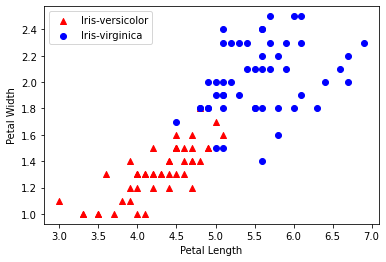

In [8]:
#plot the dataset
plt.scatter(versicolor.iloc[:,0],versicolor.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica.iloc[:,0],virginica.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [9]:
X=data
x = data.iloc[:,0:2].values
y = data.iloc[:,-1].values

In [10]:
##Splitting the data into training and testing samples
from sklearn.model_selection import train_test_split
a,b = train_test_split(X,random_state=0,test_size=0.3)

In [11]:
versicolor_train = a.loc[data.Species==0]
virginica_train = a.loc[data.Species==1]
versicolor_test = b.loc[data.Species==0]
virginica_test = b.loc[data.Species==1]

In [12]:
a_x=a.iloc[:,0:2].values
a_y=a.iloc[:,-1].values
b_x=b.iloc[:,0:2].values
b_y=b.iloc[:,-1].values

In [13]:
#Defining a shaping function for matrix Multiplication of x and theta
def shaping(x):
    ones = np.ones((len(x),1))
    x=np.hstack((ones,x))
    return x
#initializing variables
m = len(y)
theta = np.zeros([3,1])

In [14]:
#Defining the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
#Defining the cost function
## cost function = (1/m) * (-y*log(y)-(1-y)*log(1-y))
## h(x) = theta0 + theta1(x)
def Compute_cost(x,y,theta):
    m = len(y)
    x=shaping(x)
    h=sigmoid(x @ theta)
    cost = (1/m)*((-y).T @ np.log(h)-(1-y).T @ np.log((1-h)))
    return cost

In [16]:
#Defining the Gradient descent to find theta values that minimizes the cost function
## theta = theta - alpha * derivative(cost function)
## Derivative(Cost Function) = (1/m) * sigma(1->m) (h(x)-y)*x
## theta = theta - (alpha/m)* sigma(1->m) (h(x)-y)*x
def gradient_descent(x,y,theta,alpha,iterations):
    m = len(y)
    y = y.reshape(len(y),1)
    x=shaping(x)
    for i in range(iterations):
        gradient = ((1/m) * x.T @ (sigmoid(x @ theta) - y))
        theta = theta - alpha * gradient
    return theta

In [17]:
#computing cost_function for both training and testing samples
J_train = Compute_cost(a_x,a_y,theta)
J_test= Compute_cost(b_x,b_y,theta)
print(J_train)
print(J_test)

[0.69314718]
[0.69314718]


In [18]:
#hyperparameters
alpha = 0.5
iterations = 1500

In [19]:
#computing gradient descent for both training and testing samples to find optimized theta value
coeffs_train = gradient_descent(a_x,a_y,theta,alpha,iterations)
coeffs_test =gradient_descent(b_x,b_y,theta,alpha,iterations)
print(coeffs_train)

[[-15.05210943]
 [  1.51304045]
 [  4.73210317]]


In [20]:
J_train = Compute_cost(a_x,a_y,coeffs_train)
J_test = Compute_cost(a_x,a_y,coeffs_test)

In [21]:
#setting up the scale on x axis
x_values_train = [np.min(a_x[:, 0]-4), np.max(a_x[:, 1]+4)]
x_values_test = [np.min(b_x[:, 0]-4), np.max(b_x[:, 1]+4)]
#finding values of y for corresponding x using hypothesis equation
y_values_train = - (coeffs_train[0] + coeffs_train[1]* x_values_train) / coeffs_train[2]
y_values_test = - (coeffs_test[0] + coeffs_test[1]* x_values_test) / coeffs_test[2]

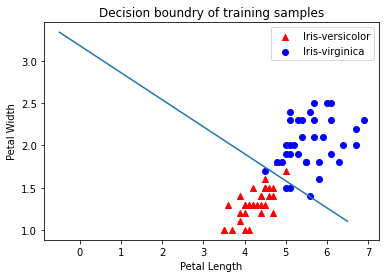

In [22]:
#plotting decision boundry for training samples
plt.scatter(versicolor_train.iloc[:,0],versicolor_train.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica_train.iloc[:,0],virginica_train.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Decision boundry of training samples")
plt.legend()
plt.plot(x_values_train,y_values_train)
plt.show()

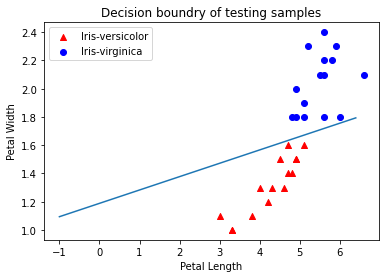

In [23]:
#plotting decision boundry for testing samples
plt.scatter(versicolor_test.iloc[:,0],versicolor_test.iloc[:,1],label = 'Iris-versicolor',color='Red',marker='^')
plt.scatter(virginica_test.iloc[:,0],virginica_test.iloc[:,1],label = 'Iris-virginica',color = 'Blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("Decision boundry of testing samples")
plt.legend()
plt.plot(x_values_test,y_values_test)
plt.show()

In [24]:
#comparing testing and predicted values of target variable
ytest=b_y
ytest = ytest.reshape(len(ytest),1)
b_x = shaping(b_x)
ypred = np.round(sigmoid(b_x @ coeffs_train))
h = np.hstack((ytest,ypred))
df=pd.DataFrame(h,columns=['ytest','ypred'])
df

,ytest,ypred
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [25]:
## predicting y values for unseen values of x
def predict():
    x1 = float(input("Enter Petal length:"))
    x2 = float(input("Enter Petal Width : "))
    x = coeffs_train[0] + coeffs_train[1] * x1 + coeffs_train[2] * x2
    result = sigmoid(x)
    result=np.round(result)
    if(result==0):
        print("Iris-versicolor")
    else:
        print("Iris-virginica")

In [26]:
predict() ##function call

Enter Petal length:3.4
Enter Petal Width : 5.6
Iris-virginica


[-0.5, 6.5]

In [29]:
y_values_test


array([1.09362729, 1.79353598])